# Lab 03: Cây quyết định & Hồi quy tuyến tính

- Họ tên: Đinh Thị Thúy Hường
- MSSV: 21120176

<font color='red'>**LƯU Ý:**</font>

- Bài làm của sinh viên phải do chính bản thân sinh viên tự làm, có thể trao đổi và tham khảo ý tưởng nhưng không được sao chép (một phần hoặc toàn bộ) code hoặc lời giải từ bất cứ người nào khác. Nếu vi phạm sẽ bị <font color='red'>0đ</font> bài tập này.
- Các bạn có thể tạo thêm các cell trong quá trình code, tuy nhiên các bạn vui lòng <font color='red'>không xóa các cell code mặc định và các cell test case</font> (vì có thể ảnh hưởng đến kết quả khi chấm bài).
- Các test case được đưa ra chỉ nhằm mục đích giúp các bạn test code của mình, <font color='red'>**việc pass các test case này không đồng nghĩa với việc lời giải của các bạn sẽ đạt điểm tối đa**</font>. 

**Cách làm bài**


Bạn sẽ làm trực tiếp trên file notebook này; trong file, từ `TODO` để cho biết những phần mà bạn cần phải làm.

**Cách nộp bài**

Khi chấm bài, đầu tiên mình sẽ chọn `Kernel` - `Restart Kernel & Run All Cells`, để restart và chạy tất cả các cell trong notebook của các bạn; do đó, trước khi nộp bài, các bạn nên chạy thử `Kernel` - `Restart Kernel & Run All Cells` để đảm bảo mọi chuyện diễn ra đúng như mong đợi.

Sau đó, các bạn tạo thư mục nộp bài theo cấu trúc sau:

- Thư mục `MSSV` (vd, nếu bạn có MSSV là 1234567 thì bạn đặt tên thư mục là `1234567`)
    - File `MSSV.ipynb` (Đổi tên file notebook này theo MSSV của bạn)

Cuối cùng, các bạn nén thư mục `MSSV` này lại và nộp ở link trên moodle. **Đuôi của file nén phải là .zip (chứ không được .rar hay gì khác).**

<font color=red>Các bạn lưu ý tuân thủ chính xác qui định nộp bài ở trên.</font>

**Nội dung bài tập**

Bài tập 3 là bài tập cá nhân. Trong bài này, bạn sẽ cài đặt thuật toán học máy: 
1. Cây quyết định (Decision tree)
2. Hồi quy tuyến tính (Linear Regression)

### Tải những thư viện cần thiết

In [1]:

import os
from zlib import adler32
from typing import Tuple, List
import requests
import shutil
import random

import scipy
import numpy as np
import sklearn.datasets as datasets
import matplotlib.pyplot as plt

C:\Users\ASUS\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Init seed
seed = 2024
random.seed(seed)
np.random.seed(seed)
os.environ["PYTHONHASHSEED"] = str(seed)

### Tải tập dữ liệu Iris

In [3]:
def download_dataset(save_path: str = "data"):
    """Function for downloading Iris dataset

    After calling this function, the dataset will automated download, unzip and remove the original zip file.
    
    The structure will organized like this: 
    data
    ├── bezdekIris.data
    ├── Index
    ├── iris.data
    └── iris.names
    
    Args:
        save_path (str, optional): Path to save directory for Iris dataset. Defaults to "data".
    """
    # Setup directory
    data_dir = os.path.join(
        os.getcwd(), save_path
    )  # Join paths to get the data directory path

    # Create the directory if it doesn't exist
    if not os.path.exists(data_dir):
        os.makedirs(data_dir, exist_ok=True)
    else:
        # If exists, removes it :)
        shutil.rmtree(data_dir)
        os.makedirs(data_dir, exist_ok=True)

    # Define URL and file paths
    iris_url = "https://archive.ics.uci.edu/static/public/53/iris.zip"
    iris_zip_path = os.path.join(data_dir, "iris.zip")

    # Download the iris dataset ZIP file
    with requests.get(iris_url, stream=True) as r:
        with open(iris_zip_path, "wb") as f:
            shutil.copyfileobj(r.raw, f)

    # Extract the ZIP file
    shutil.unpack_archive(iris_zip_path, data_dir)

    # Remove the ZIP file after extraction
    os.remove(iris_zip_path)
    
# Download Iris and mpg dataset by calling `download_dataset` function
download_dataset()

### Đọc tập dữ liệu Iris

In [4]:
def iris_dataloader(data_path: str = "data/iris.data") -> Tuple[np.ndarray, np.ndarray]:
    """Function for loading Iris dataset :)

    Args:
        data_path (str, optional): Path to Iris dataset. Defaults to "data/iris.data".

    Returns:
        Tuple[np.ndarray, np.ndarray]: return two numpy's array named `features` and `classes`, respectively.
    """
    # YOUR CODE HERE
    # raise NotImplementedError()
    sepal_length = []
    sepal_width = []
    petal_length = []
    petal_width = []
    classes = []

    # Classes mapping
    class_mapping = {"Iris-setosa": 0,
                     "Iris-versicolor": 1, "Iris-virginica": 2}

    # Read data from file
    with open(data_path, "r") as file:
        # Read data each line
        for line in file:
            line = line.strip()  # Remove newline character and leading/trailing spaces
            if line:  # Check if line is not empty
                parts = line.split(",")
                sepal_length.append(float(parts[0]))
                sepal_width.append(float(parts[1]))
                petal_length.append(float(parts[2]))
                petal_width.append(float(parts[3]))
                classes.append(class_mapping[parts[4]])

    # Concatenate features
    features = np.array(
        [sepal_length, sepal_width, petal_length, petal_width]).T

    # Convert classes to numpy array
    classes = np.array(classes)

    return features, classes


# Thực hiện tải dữ liệu
features, classes = iris_dataloader()
features.shape, classes.shape

((150, 4), (150,))

In [5]:
# TEST
assert (
    adler32(str(features[0][:5] + features[1][:5] + features[2][:5]).encode())
    == 750060552
)

### Phân chia tập train-valid-test

In [6]:
def train_test_split(
    X: np.ndarray, y: np.ndarray, test_ratio=0.33
) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    """Function for proceduring train, and test sets.

    Args:
        X (np.ndarray): input features.
        y (np.ndarray): input labels.
        test_ratio (float, optional): ratio size for test sets. Defaults to 0.33.

    Returns:
        Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]: features, label for train, test respectively. 
        They are represented as numpy array.
    """
    n = X.shape[0]
    idx = np.random.permutation(n)  # Shuffle indices
    train_size = int((1 - test_ratio) * n)

    # Split indices for training and test sets
    train_idx = idx[:train_size]
    test_idx = idx[train_size:]

    # Index into X and y to create training and test sets
    X_train = X[train_idx, :]
    X_test = X[test_idx, :]

    y_train = y[train_idx]
    y_test = y[test_idx]

    return (
        X_train,
        X_test,
        y_train,
        y_test,
    )


# Phân chia tập train, test.
X_train, X_test, y_train, y_test = train_test_split(features, classes)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((100, 4), (50, 4), (100,), (50,))

In [7]:
# TEST
SP = X_train.shape + X_test.shape + y_train.shape + y_test.shape
assert adler32(str(SP).encode()) == 867828770

## Cây quyết định

### Độ lợi thông tin

Thông tin kỳ vọng (entropy):

$$Entropy=-\sum_{i}^{n}p_ilog_{2}(p_i)$$

Hàm entropy đạt giá trị nhỏ nhất nếu có một giá trị $p_i=1$, đạt giá trị lớn nhất nếu tất cả các $p_i$ bằng nhau. Những tính chất này của hàm entropy khiến nó được sử dụng trong việc đo độ hỗn loạn của một phép phân chia của ID3.

In [8]:
def entropy(counts: List, n_samples: int) -> float:
    """Function for calculating entropy

    Args:
        counts (list): list number of samples in each class.
        n_samples (int): number of data samples.

    Return:
        entropy (float).
    """
    # YOUR CODE HERE
    # Calculate the probabilities of each class
    probabilities = [count / n_samples for count in counts]
    
    # Calculate the entropy using the formula
    entropy = -sum(p * np.log2(p) for p in probabilities if p > 0)
    return entropy

In [9]:
def entropy_of_one_division(division: np.ndarray) -> Tuple[float, int]:
    """Function for calculating entropy of a divided group of data.

    Please note that data may have multiple classes.

    Args:
        division (np.ndarray): input divided group of data.

    Returns:
        Tuple[float, int]: entropy of a divided group of data.
    """
    n_samples = len(division)
    n_classes = set(division)

    counts = []
    # count samples in each class then store it to list counts
    # YOUR CODE HERE
    for ci in n_classes:
        counts.append(np.sum(division == ci))
    # Calculate entropy
    each_entropy = entropy(counts,n_samples)
    return each_entropy, n_samples

In [10]:
def get_entropy(y_predict: np.ndarray, y: np.ndarray):
    """Get entropy for a split.

    Args:
        y_predict (np.ndarray): the split decision by cutoff, True/Fasle.
        y (np.ndarray): grouth truth.

    Returns:
        s (float): entropy of input split, as real-number represented with float type.
    """
    n = len(y)
    entropy_true, n_true = entropy_of_one_division(y[y_predict])  # left hand side entropy
    
    entropy_false, n_false = entropy_of_one_division(y[~y_predict])  # right hand side entropy
    # overall entropy
    # YOUR CODE HERE
    s = (n_true / n) * entropy_true + (n_false / n) * entropy_false
    return s

Độ lợi thông tin phân lớp tập D theo thuộc tính A:
$$ Gain(A)=Entropy(D)-Entropy_{A}(D)$$

Trong ID3, tại mỗi node, thuộc tính được chọn được xác định dựa trên là thuộc tính khiến cho information gain đạt giá trị lớn nhất.

Các thuộc tính của tập Iris đều có giá trị liên tục. Do đó ta cần rời rạc hóa cho từng thuộc tính. Cách đơn giản là sử dụng một ngưỡng `cutoff` chia giá trị của dữ liệu trên mỗi thuộc tính sẽ làm 2 phần: `<cutoff` và `>=cutoff`.

Để tìm ngưỡng `cutoff` tốt nhất cho mỗi thuộc tính ta lần lượt thay `cutoff` bằng các giá trị của thuộc tính sau đó tính entropy, `cutoff` tốt nhất khi entropy bé nhất 

$$\left(\arg\min Entropy_{A}(D)\right)$$

### Cài đặt

#### Tìm một phân hoạch với một độ lợi thông tin cho trước

In [11]:
def find_best_split(
    col_data: np.ndarray, y: np.ndarray
) -> Tuple[np.float64, np.float64]:
    """Function for calculating minimum entropy for a given attributes and its label.

    Args:
        col_data (np.ndarray): input column data in training dataset.
        y (np.ndarray): given label in the training dataset.

    Returns:
        min_entropy, cutoff (Tuple[np.float64, np.float64]): the minimum entropy, and cut-off value.
    """
    min_entropy = float("inf")
    cutoff = None

    # Loop through col_data find cutoff where entropy is minimum
    for value in set(col_data):
        y_predict = col_data < value
        my_entropy = get_entropy(y_predict, y)

        # min entropy=?, cutoff=?
        # YOUR CODE HERE
        # Update min_entropy and cutoff if a lower entropy is found
        if my_entropy < min_entropy:
            min_entropy = my_entropy
            cutoff = value

    # Return min entropy, and cutoff
    return min_entropy, cutoff

In [12]:
def find_best_split_of_all(
    X: np.ndarray, y: np.ndarray
) -> Tuple[np.float64, np.float64, np.float64]:
    """Function for finding one split given an information gain.

    Args:
        X (np.ndarray): input training dataset.
        y (np.ndarray): given label in the training dataset.

    Returns:
        col_idx, cutoff, min_entropy (Tuple[np.float64, np.float64, np.float64]): return the index 
        of column with minimum entropy and cut-off value.
    """
    col_idx = None
    min_entropy = float("inf")
    cutoff = None

    for idx, col_data in enumerate(X.T):
        entropy, cur_cutoff = find_best_split(col_data, y)

        if entropy == 0:  # best entropy
            return idx, cur_cutoff, entropy
        elif entropy <= min_entropy:
            min_entropy = entropy
            col_idx = idx
            cutoff = cur_cutoff

    return col_idx, cutoff, min_entropy

#### Khớp dữ liệu

In [13]:
def dtfit(X: np.ndarray, y: np.ndarray, depth: int = 0) -> dict:
    """Function for data-fitting with Decision Tree

    Node: each node represented by cutoff value and column index, value and children.
         - cutoff value is thresold where you divide your attribute,
         - column index is your data attribute index,
         - value of node is mean value of label indexes,
           if a node is leaf all data samples will have same label.

    Note that: we divide each attribute into 2 part => each node will have 2 children: left, right.

    Args:
        X (np.ndarray): training data
        y (np.ndarray): label of training data
        depth (int, optional): depth of decision tree after training. Defaults to 0.

    Returns:
        node (dict): return the node that contains cutoff value and column index, value and children.
    """
    # Stop conditions: if all value of y are the same
    if np.all(y == y[0]):
        return {"val": y[0]}

    # find one split given an information gain
    col_idx, cutoff, entropy = find_best_split_of_all(X, y)

    y_left = y[X[:, col_idx] < cutoff]
    y_right = y[X[:, col_idx] >= cutoff]
    X_left = X[X[:, col_idx] < cutoff]
    X_right = X[X[:, col_idx] >= cutoff]

    node = {
        "index_col": col_idx,
        "cutoff": cutoff,
        "val": np.mean(y),
        "left": None,
        "right": None,
    }

    node["left"] = dtfit(X_left, y_left, depth + 1)
    node["right"] = dtfit(X_right, y_right, depth + 1)

    return node

In [14]:
# Khớp dữ liệu
tree = dtfit(X_train, y_train)

#### Dự đoán

In [15]:
def _dtpredict(tree: dict, row: np.ndarray) -> int:
    """Function for making prediction use trained DT tree on given observation.

    Args:
        tree (dict): trained DT model which presented as a dict.
        row (np.ndarray): given observation which presented as numpy's array.

    Returns:
        val (int): return the value of node which is mean value of label indexes.
    """
    cur_layer = tree
    while "cutoff" in cur_layer:
        if row[cur_layer["index_col"]] < cur_layer["cutoff"]:
            cur_layer = cur_layer["left"]
        else:
            cur_layer = cur_layer["right"]
    return cur_layer.get("val", False)

In [16]:
# TEST
given_observation = features[81]
groud_truth = classes[81]
assert groud_truth == _dtpredict(tree, given_observation)

In [17]:
def dtpredict(tree: dict, data: np.ndarray) -> List:
    """Function for making prediction with trained DT model on given input observations.

    Args:
        tree (dict): trained DT model which presented as a dict.
        data (np.ndarray): input input observations.

    Returns:
        pred (List): list of predicted label for input observations.
    """
    pred = []
    for _, col in enumerate(data):
        pred.append(_dtpredict(tree, col))
    return pred

In [18]:
# TEST
given_observations = features[81:118]
groud_truth = classes[81:118]
res = (groud_truth == dtpredict(tree, given_observations))
assert adler32(str(res).encode()) == 382551575

#### Đánh giá mô hình

In [19]:
def tpfptnfn_cal(
    y_test: np.ndarray, y_pred: np.ndarray, positive_class: int = 1
) -> Tuple[int, int, int, int]:
    """Function for calculating elements of confusion matrix.

    Args:
        y_test (np.ndarray): groud truth.
        y_pred (np.ndarray): predicted label.
        positive_class (int, optional): wanted calculating class. Defaults to 1.

    Returns:
        true_positives, false_positives, true_negatives, false_negatives (Tuple[int, int, int, int]): Four 
        basic number for constructing confusion matrix  including true positives, false positives, true negatives, 
        and false negatives.
    """
    true_positives = 0
    false_positives = 0
    true_negatives = 0
    false_negatives = 0

    # Calculate true positives, false positives, false negatives, and true negatives
    # YOUR CODE HERE
    for yt, yp in zip(y_test, y_pred):
        if yt == positive_class and yp == positive_class:
            true_positives += 1
        elif yt != positive_class and yp == positive_class:
            false_positives += 1
        elif yt == positive_class and yp != positive_class:
            false_negatives += 1
        else:
            true_negatives += 1

    return true_positives, false_positives, true_negatives, false_negatives

In [20]:
# TEST
tp, fp, tn, fn = tpfptnfn_cal([1, 0, 1, 1, 0, 0, 1], [1, 0, 0, 1, 0, 1, 1])
assert adler32((str(tp) + str(fp) + str(tn) + str(fn)).encode()) == 33030344

In [21]:
# Dự đoán
pred = dtpredict(tree, X_test)

In [22]:
def calculate_metrics(
    y_test: np.ndarray, y_pred: np.ndarray
) -> Tuple[float, float, float, float]:
    """Function for calculating metrics of classification problem including accuracy, recall, 
    precision, and f1-score.

    Args:
        y_test (np.ndarray): groud truth.
        y_pred (np.ndarray): predicted label.

    Returns:
        acc, precision, recall, f1 (Tuple[float, float, float, float]): return four values 
        for each metric: accuracy, recall, precision, and f1-score.
    """
    acc = 0
    precision = 0
    recall = 0
    f1 = 0

    noc = len(np.unique(y_test))  # number of classes

    # YOUR CODE HERE
    for ci in np.unique(y_test):
        tp, fp, tn, fn = tpfptnfn_cal(y_test, y_pred, positive_class=ci)

        # Calculate metrics for the current class
        class_accuracy = (tp + tn) / (tp + tn + fp + fn) if (tp + tn + fp + fn) > 0 else 0
        class_precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        class_recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        class_f1 = 2 * class_precision * class_recall / (class_precision + class_recall) if (class_precision !=0 and class_recall !=0) else 0

        # Accumulate metrics
        acc += class_accuracy
        precision += class_precision
        recall += class_recall
        f1 += class_f1

    # Average the metrics across all classes
    acc /= noc
    precision /= noc
    recall /= noc
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) else 0

    # Just for logging
    print(f"acc: {acc}\nprecision: {precision}\nrecall: {recall}\nf1_score: {f1}\n")
    return acc, precision, recall, f1

In [23]:
# Đánh giá mô hình cây quyết định.
calculate_metrics(y_test, pred)

acc: 0.9733333333333333
precision: 0.9606481481481483
recall: 0.9606481481481483
f1_score: 0.9606481481481483



(0.9733333333333333,
 0.9606481481481483,
 0.9606481481481483,
 0.9606481481481483)

### Nghiên cứu về ý nghĩa các độ đo

Bạn hãy trình ý nghĩa từng độ đo, bao gồm accuracy, precision, recall và f-score.

- **Accuracy**
    - Ý nghĩa:
        - Accuracy là độ đo cơ bản nhất để đánh giá tỷ lệ các dự đoán đúng của mô hình so với tổng số dự đoán.
        - Nó thường được sử dụng để đo lường khả năng chính xác của mô hình phân loại.
        - Accuracy cho ta biết tỷ lệ phần trăm các dự đoán đúng trong tổng số lượng mẫu.
    - Vai trò:
        - Accuracy cung cấp một cái nhìn tổng quát về hiệu suất của mô hình.
        - Nó là tiêu chuẩn chính để so sánh giữa các mô hình khác nhau.
        - Accuracy phù hợp khi các lớp dữ liệu có sự cân bằng về số lượng mẫu.
    - Lưu ý:
        - Tuy nhiên, accuracy có thể bị sai lệch nếu các lớp dữ liệu không cân bằng về số lượng mẫu. Ví dụ, trong trường hợp 95% dữ liệu thuộc về lớp A và chỉ 5% thuộc về lớp B, một mô hình đoán tất cả là lớp A có thể đạt accuracy cao nhưng không phản ánh chính xác khả năng phân loại của nó.

- **Precision & Recall:**
    - Precision là tỉ lệ số điểm Positive mô hình dự đoán đúng trên tổng số điểm mô hình dự đoán là Positive. Recall là tỉ lệ số điểm Positive mô hình dự đoán đúng trên tổng số điểm thật sự là Positive (hay tổng số điểm được gán nhãn là Positive ban đầu).
    - Precision càng cao, tức là số điểm mô hình dự đoán là positive đều là positive càng nhiều. Precision = 1, tức là tất cả số điểm mô hình dự doán là Positive đều đúng, hay không có điểm nào có nhãn là Negative mà mô hình dự đoán nhầm là Positive. Recall càng cao, tức là số điểm là positive bị bỏ sót càng ít. Recall = 1, tức là tất cả số điểm có nhãn là Positive đều được mô hình nhận ra.
    - Để hiểu rõ hơn về hai chỉ số này, ta có thể tưởng tượng một ví dụ như sau. Khi một người nghĩ là mình đang mắc bệnh gì đó, họ thường đi đến bệnh viện để làm các xét nghiệm để bác sĩ chẩn đoán xem kết quả là dương tính hay là âm tính. Ta có hai trường hợp về tình trạng bệnh là mắc bệnh hoặc không mắc bệnh. Ta có hai trường hợp về kết quả chẩn đoán là dương tính và âm tính.
    - Khi đó, precision là tỉ lệ người được chẩn đoán là dương tính thật sự mắc bệnh trên tổng số người được chẩn đoán là dương tính. Nếu precision = 0.9, thì cứ 100 người được chẩn đoán là dương tính thì sẽ thật sự có 90 người mắc bệnh. Precision càng cao thì xác suất người được chẩn đoán là dương tính có khả năng mắc bệnh càng cao.
    - Recall là tỉ lệ người được chẩn đoán là dương tính thật sự mắc bệnh trên tổng số người thật sự mắc bệnh. Nếu recall = 0.9, thì cứ 100 người mắc bệnh thì sẽ chẩn đoán 90 người dương tính. Recall càng cao thì xác suất người mắc bệnh được chẩn đoán là dương tính càng cao.
- **F1-score:**
    - Tuy nhiên, chỉ có Precision hay chỉ có Recall thì không đánh giá được chất lượng mô hình.
        - Chỉ dùng Precision, mô hình chỉ đưa ra dự đoán cho một điểm mà nó chắc chắn nhất. Khi đó Precision = 1, tuy nhiên ta không thể nói là mô hình này tốt.
        - Chỉ dùng Recall, nếu mô hình dự đoán tất cả các điểm đều là positive. Khi đó Recall = 1, tuy nhiên ta cũng không thể nói đây là mô hình tốt.
    - => Khi đó F1-score được sử dụng. F1-score là trung bình điều hòa (harmonic mean) của precision và recall (giả sử hai đại lượng này khác 0). F1-score được tinh theo công thức: 2/F1 = 1/precision + 1/recall.


## Hồi quy tuyến tính

Ta xem xét một bộ dữ liệu thí nghiệm như sau (nói trước, bộ này không có trong thực tế, chỉ mang tính chất giới thiệu về hồi quy tuyến tính). Bộ dữ liệu này chỉ có một biến độc lập, và một biến phụ thuộc. 

|   | 1  | 2  | 3  | 4  | 5  | 6  | 7  | 8  | 9  | 10 |
|---|---|---|---|---|---|---|---|---|---|---|
| $X$  | 7.0  | 6.5  | 6.5  | 6.0  | 6.0  | 6.0  | 5.5  | 5.5  | 5.0  | 4.5  |
| $Y$  | 29  | 32  | 31  | 34  | 32  | 35  | 40  | 43  | 48  | 50  |

In [24]:
def RMSE(y, ypred):
    rmse = np.sqrt(np.mean((y-ypred)**2))
    return rmse

In [25]:
# Chuẩn bị dữ liệu
X = np.array([7.0, 6.5, 6.5, 6.0, 6.0, 6.0, 5.5, 5.5, 5.0, 4.5])
y = np.array([29, 32, 31, 34, 32, 35, 40, 43, 48, 50])
X = X.reshape(-1,1) # 5x1 vector, N=5, D=1
y = y.reshape(-1,1) # 5x1 vector

Xem biểu đồ tương quan giữa biến độc lập và biến phụ thuộc.

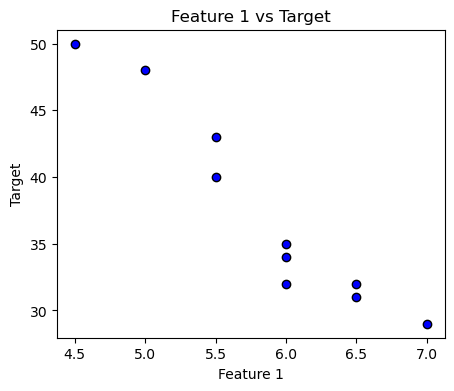

In [26]:
# Create a figure and two subplots
fig, axs = plt.subplots(1, 1, figsize=(5, 4))

# Scatter plot for the first feature
axs.scatter(X, y, color='blue', edgecolors='k')
axs.set_xlabel('Feature 1')
axs.set_ylabel('Target')
axs.set_title('Feature 1 vs Target')

# Display the plots
plt.show()

Dựa trên hình ảnh trực quan hóa, ta có thể sử dụng mô hình hồi quy để mô hình hóa quan hệ giữa các feature 1 với target. Xem xét dạng của bài toán hồi quy tuyến tính như sau:

$$
y = \boldsymbol x^T\boldsymbol\theta + \epsilon\,,\quad \epsilon \sim \mathcal N(0, \sigma^2)
$$
trong đó $\boldsymbol x\in\mathbb{R}^D$ là biến phụ thuộc (đầu vào) và $y\in\mathbb{R}$ là các quan sát bị nhiễu. Vector tham số $\boldsymbol\theta\in\mathbb{R}^D$ tham số hóa hàm tuyến tính này.

Giả sử có tập huấn luyện $(\boldsymbol x_n, y_n)$, $n=1,\ldots, N$. Ta hình thức hóa các bộ dữ liệu đầu vào huấn luyện theo thứ tự $\mathcal X = \{\boldsymbol x_1, \ldots, \boldsymbol x_N\}$ và các mục tiêu huấn luyện tương ứng $\mathcal Y = \{y_1, \ldots, y_N\}$.

### Triển vọng cực đại

Phương pháp ước tính triển vọng cực đại của các tham số $\boldsymbol\theta$. Trong ước tính triển vọng cực đại, các tham số $\boldsymbol\theta^{\mathrm{ML}}$ cực đại hóa likelihood

$$
p(\mathcal Y | \mathcal X, \boldsymbol\theta) = \prod_{n=1}^N p(y_n | \boldsymbol x_n, \boldsymbol\theta)\,.
$$

Giải bài toán tối ưu, nghiệm thu được là:

$$
\boldsymbol\theta^{\text{ML}} = (\boldsymbol X^T\boldsymbol X)^{-1}\boldsymbol X^T\boldsymbol y\in\mathbb{R}^D\,,
$$
trong đó:
$$
\boldsymbol X = [\boldsymbol x_1, \ldots, \boldsymbol x_N]^T\in\mathbb{R}^{N\times D}\,,\quad \boldsymbol y = [y_1, \ldots, y_N]^T \in\mathbb{R}^N\,.
$$

In [27]:
def MLE(X, y):
    """Hàm ước lượng triển vọng cực đại

    Parameters
    ----------
    X
        N x D ma trận dữ liệu huấn luyện đầu vào
    y
        N x 1 vector của mục tiêu huấn luyện/ quan sát huấn luyện

    Returns
    -------
        tham số triển vọng cực đại (D x 1)
    """
    
    # Ước lượng tham số theta_ml bằng phương pháp hồi quy tuyến tính
    theta_ml = np.linalg.inv(X.T @ X) @ X.T @ y
    return theta_ml

In [28]:
def predict_with_estimate(Xtest, theta):
    """Hàm dự đoán

    Parameters
    ----------
    Xtest
        K x D ma trận dữ liệu kiểm tra
    theta
        D x 1 vector tham số

    Returns
    -------
        kết quả dự đoán f(Xtest); K x 1 vector
    """
    # YOUR CODE HERE
    # Dự đoán kết quả
    prediction = Xtest @ theta
    return prediction 

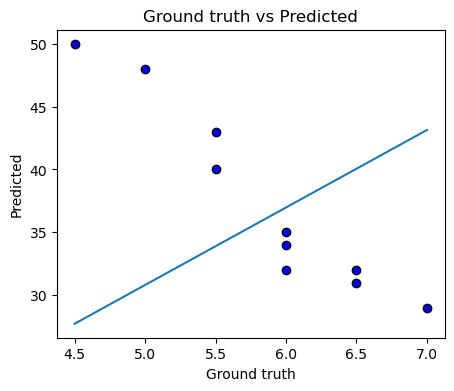

In [29]:
# Tính toán ước lượng triển vọng cực đại
theta_ml = MLE(X, y)

# dự đoán các giá trị hàm tại các điểm kiểm tra bằng bộ ước lượng triển vọng cực đại
mle_pred = predict_with_estimate(X, theta_ml)

# Trực quan
fig, axs = plt.subplots(1, 1, figsize=(5, 4))

axs.scatter(X, y, color='blue', edgecolors='k')
axs.plot(X, mle_pred)
axs.set_xlabel('Ground truth')
axs.set_ylabel('Predicted')
axs.set_title('Ground truth vs Predicted')

plt.show()

In [30]:
# Đánh giá RMSE
RMSE(y, mle_pred)

11.383352122444272

TODO: Bạn có nhận xét gì?

- Giá trị Root Mean Squared Error (RMSE) khoảng 11.38 cho thấy các dự đoán của mô hình, sử dụng phương pháp ước lượng triển vọng cực đại (MLE), có sai số trung bình khoảng 11.38 đơn vị so với các giá trị thực (y).
- Giá trị RMSE là 11.38 có được coi là sai số khá lớn trong bài này => Giá trị RMSE càng thấp thì mô hình dự đoán càng tốt, bởi nó cho thấy các dự đoán gần với giá trị thực tế hơn. Do đó, ta cần có độ chính xác cao hơn. (RMSE thấp hơn)

Ta sẽ thêm một bias vào mô hình để nó linh hoạt hơn.

$$
y = \theta_0 + \boldsymbol x^T \boldsymbol\theta_1 + \epsilon\,,\quad \epsilon\sim\mathcal N(0,\sigma^2)
$$

Định nghĩa:

$$\boldsymbol x_{\text{aug}} = \begin{bmatrix}1\\\boldsymbol x\end{bmatrix}$$

Ta viết lại phương trình mô hình hồi quy tuyến tính:

$$
y = \boldsymbol x_{\text{aug}}^T\boldsymbol\theta_{\text{aug}} + \epsilon\,,\quad \boldsymbol\theta_{\text{aug}} = \begin{bmatrix}
\theta_0\\
\boldsymbol\theta_1
\end{bmatrix}\,.
$$

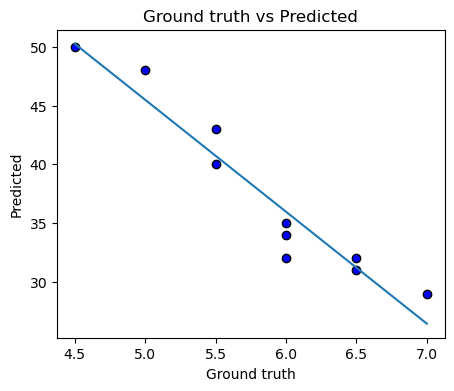

In [31]:
# Thêm bias vào data (cột đầu tiên full 1)
X_aug = np.hstack([np.ones((len(X),1)), X])

# Tính toán ước lượng triển vọng cực đại
theta_ml = MLE(X_aug, y)

# dự đoán các giá trị hàm tại các điểm kiểm tra bằng bộ ước lượng triển vọng cực đại
mle_pred = predict_with_estimate(X_aug, theta_ml)

# Trực quan
fig, axs = plt.subplots(1, 1, figsize=(5, 4))

axs.scatter(X, y, color='blue', edgecolors='k')
axs.plot(X, mle_pred)
axs.set_xlabel('Ground truth')
axs.set_ylabel('Predicted')
axs.set_title('Ground truth vs Predicted')

plt.show()


In [32]:
# Đánh giá RMSE
RMSE(y, mle_pred)

1.995018672215266

TODO: Bạn có nhận xét gì?

- Giá trị RMSE là 1.995 cho thấy rằng mô hình trung bình mỗi dự đoán sai lệch khoảng 1.995 đơn vị so với giá trị thực tế.
- Giá trị RMSE này có thể coi là khá thấp, cho thấy mô hình có khả năng dự đoán khá tốt và các dự đoán gần với giá trị thực tế.
- Khi không có intercept, đường hồi quy sẽ đi qua gốc tọa độ (0,0), điều này có thể làm giảm tính chính xác của mô hình vì nó không phản ánh chính xác sự biến thiên của dữ liệu. Thêm cột 1 (intercept) cho phép mô hình học được chệch (bias) của dữ liệu, giúp điều chỉnh đường hồi quy sao cho phù hợp hơn với dữ liệu thực tế. Việc thêm cột 1 vào dữ liệu (intercept) giúp mô hình hồi quy tuyến tính có thể học mối quan hệ tuyến tính giữa biến đầu vào và biến mục tiêu một cách chính xác hơn, dẫn đến dự đoán tốt hơn và giảm độ lỗi RMSE từ 11.383 xuống còn 1.995.

### Phi tuyến hóa hồi quy tuyến tính 

Ta hoàn toàn có thể khớp các hàm phi tuyến tính trong đầu vào $\boldsymbol x$, miễn là các tham số $\boldsymbol\theta$ xuất hiện tuyến tính. Điều này có nghĩa là, chúng ta có thể học các hàm có dạng:

$$
f(\boldsymbol x, \boldsymbol\theta) = \sum_{k = 1}^K \theta_k \phi_k(\boldsymbol x)\,,
$$
trong đó các đặc trưng $\phi_k(\boldsymbol x)$ là các phép biến đổi (có thể phi tuyến tính) của các đầu vào $\boldsymbol x$.

Một trong những loại hàm thường hay sử dụng đó là hàm đa thức bậc $K$, ta viết

$$
\sum_{k=0}^K \theta_k x^k = \boldsymbol \phi(x)^T\boldsymbol\theta\,,\quad
\boldsymbol\phi(x)= 
\begin{bmatrix}
x^0\\
x^1\\
\vdots\\
x^K
\end{bmatrix}\in\mathbb{R}^{K+1}\,.
$$
Ở đây, $\boldsymbol\phi(x)$ là phép biến đổi đặc trưng phi tuyến tính của các đầu vào $x\in\mathbb{R}$.

Từ đó, tập huấn luyện sau khi biến đổi có dạng:
$$
\boldsymbol\Phi = \begin{bmatrix}
\boldsymbol\phi(x_1) & \boldsymbol\phi(x_2) & \cdots & \boldsymbol\phi(x_n)
\end{bmatrix}^T \in\mathbb{R}^{N\times K+1}
$$

In [33]:
def poly_features(X, K):
    """tính toán ma trận đặc trưng Phi (N x (K+1))

    Parameters
    ----------
    X
        đầu vào có kích thước N x 1
    k
        bậc của đa thức

    Returns
    -------
        tính toán ma trận đặc trưng Phi (N x (K+1))
    """
    # YOUR CODE HERE
    N = len(X)
    Phi = np.zeros((N, K + 1))  # Initialize the polynomial feature matrix

    for i in range(K + 1):
        Phi[:, i] = np.power(X, i).flatten()

    return Phi

Nghiệm tối ưu

$$
\boldsymbol \theta^\text{ML} = (\boldsymbol\Phi^T\boldsymbol\Phi)^{-1}\boldsymbol\Phi^T\boldsymbol y
$$

Nghiệm tối ưu (+tối ưu tính toán số học)

$$
\boldsymbol \theta^\text{ML} = (\boldsymbol\Phi^T\boldsymbol\Phi + \kappa\boldsymbol I)^{-1}\boldsymbol\Phi^T\boldsymbol y
$$

In [34]:
def nonlinearMLE(Phi, y):
    """Non-linear MLE

    Parameters
    ----------
    Phi
        ma trận đặc trưng cho dữ liệu đầu vào. Kích thước N x (K+1)
    y
       các mục tiêu huấn luyện. Kích thước N x 1

    Returns
    -------
        bộ ước lượng triển vọng cực đại theta_ml. Kích thước D x 1
    """
    
    kappa = 1e-08 # 'jitter' term; nhằm mục tiêu tối ưu tính toán số học
    
    # YOUR CODE HERE
    N, D = Phi.shape
    theta_ml = np.linalg.inv(Phi.T @ Phi + kappa * np.eye(D)) @ Phi.T @ y
    return theta_ml

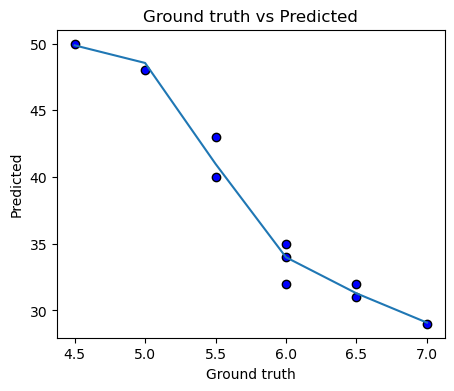

In [35]:
k = 5 # Định nghĩa bậc đa thức mà ta muốn khớp

phiX = poly_features(X, k) # N x (K+1) ma trận đặc trưng

poly_theta_ml = nonlinearMLE(phiX, y) # bộ ước lượng triển vọng cực đại

mle_pred = predict_with_estimate(phiX, poly_theta_ml)

# Trực quan
fig, axs = plt.subplots(1, 1, figsize=(5, 4))

axs.scatter(X, y, color='blue', edgecolors='k')
axs.plot(X, mle_pred)
axs.set_xlabel('Ground truth')
axs.set_ylabel('Predicted')
axs.set_title('Ground truth vs Predicted')

plt.show()

In [36]:
# Đánh giá RMSE
RMSE(y, mle_pred)

1.0451325702487468

TODO: Bạn có nhận xét gì?

- Sử dụng phi tuyến hóa giúp mô hình hồi quy tuyến tính có khả năng mô hình hóa tốt hơn các mối quan hệ phức tạp giữa các biến đầu vào và biến mục tiêu. Điều này làm tăng hiệu quả và tính khả dụng của mô hình => RMSE giảm từ 1.95 xuống còn 1.045 => cho thấy mô hình có khả năng dự đoán chính xác hơn.